### 2-2. 사이킷런으로 시작하는 머신러닝

머신러닝의 적용은 데이터의 가공 및 변환과정의 전처리 작업, 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 셋 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델로 학습시키단. 그리고 학습된 모델을 기본으로 테스트 데이터에 대한 예측을 수행하고, 이렇게 예측된 결괏값을 실제 결괏값과 비교하여 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성된다. 

1. 데이터 전처리 작업 : 오류 데이터의 보정, 결손값 처리, 레이블 인코딩 or 원핫 인코딩, 피처 스케일링/정규화 작업
2. 머신러닝 모델의 적용 : 희소데이터에 의해 편중된 결과의 가능성 존재, 따라서 교차검증 실시(kfold, stratified), 최적의 파라미터 적용

1. 데이터 전처리
 - 데이터 인코딩
 - 피처 스케일링과 정규화
 - standardscaler
 - minmaxscaler
2. 사이킷런으로 실행하는 타이타닉 생존자 예측
3. 정리

#### 1. 데이터 전처리 <br>
feature값 중에서 null값이 얼마 되지 않으면 feature의 평균 값으로 대체하는 것이 가능하다. 하지만 null의 값이 대부분이라면 오히려 해당 feature는 drop하는 것이 좋다. 하지만 일정 수준 이상 null값이나, 중요한 feature인 경우에, 왜곡이 심하게 될 수 있어, 업무 로직을 상세히 검토하고 더 정밀한 대체 값을 선정해야 한다. <br>
사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 따라서 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야 한다. 따라서 category형 feature는 코드 값으로 표현하고, 텍스트형 피처는 벡터화 등의 기법으로 벡터화하거나 불필요한 경우 인코딩하지 않고 삭제하는 것이 좋다. 식별자 feature는 오히려 예측 성능을 떨어뜨릴 수 있기 때문이다. 

##### 데이터 인코딩
**인코딩** : 사람이 인지할 수 있는 형태로 데이터를 약속된 규칙에 의해 컴퓨터가 사용하는 0과 1로 변환하는 과정을 통틀어 일컫는다.<br>
- 레이블 인코딩 방식 : catagory feature을 코드형 숫자로 반환 (eg) tv:1, 냉장고:2, 전자레인지:3... 
- 원-핫 인코딩 방식 : 더미변수를 생성하는 것과 동일한 원리로 0,1을 생성한다

(1) 레이블 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] #txt로 처리된 items를 레이블 인덱싱 할 예정

#labelencoder을 객체로 생성한 후에 fit()과 transform()으로 레이블 인덱싱 수행
encoder=LabelEncoder() #레이블 인덱싱 수행하는 객체를 선언
encoder.fit(items)  #items를 레이블 인덱싱
labels=encoder.transform(items)  #items에 대해 labelfit한 값을 transform해준다
print("인코딩 변환값:",labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [2]:
#인코딩 클래스를 확인
print("인코딩 클래스:",encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
#인코딩한 값을 다시 디코딩한 방법
#레이블을 입력하여 원래 텍스트 값을 돌려받는 경우
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


하지만 숫자변환값은 단순코드이지 숫자 값에 따른 순서나 중요도로 계산되어서는 안된다. 트리계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩이 상관이 없다.(즉 트리모형에서는 레이블 인코딩 가능.) 하지만 회귀의 경우에는 가중치의 영향을 받으므로 레이블 인코딩을 사용하지 못한다. 따라서 원-핫 인코딩을 사용하여야 한다.

(2) 원-핫 인코딩

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 레이블로 반환한 다음에 원-핫 인코딩을 진행해야 한다. (pandas를 사용하지 않는 경우)
encoder=LabelEncoder() #객체의 선언
encoder.fit(items)
labels=encoder.transform(items)

In [18]:
#2차원 데이터로 변환
#아래 원-핫 인코딩 변환의 형태와 비교하기 위한다
labels=labels.reshape(-1,1)

In [19]:
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [43]:
#아래 코드에서의 버전오류 warning을 무시
import warnings
warnings.filterwarnings('ignore')

In [45]:
#원-핫 인코딩을 적용한다
oh_encoder=OneHotEncoder() #원핫인코더 객체 선언
oh_encoder.fit(labels) #fit->transform으로 진행하는 형태는 레이블과 동일하다
oh_labels=oh_encoder.transform(labels)
print(oh_labels.toarray()) #원핫인코딩으로 변환한 값을 2차원 ndarray로 변환한다

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


pandas에서는 one-hot encoding을 더 쉽게 지원하는 api가 존재한다. get_dummies()를 이용한다. 앞에서 기본 sklearn모듈을 사용했을 때는 레이블로 바꿔서 다시 원-핫 인코딩으로 바꿔야만 가능했다. (애초에 텍스트 data를 인코딩 해줘야 하므로), 하지만 **pandas모듈을 사용하게 된다면 문자열 카테고리를 숫자형으로 반환할 필요없이 바로 변환이 가능하다**

In [23]:
import pandas as pd
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [24]:
pd.get_dummies(df) #categortical data를 포함하는 데이터 프레임에 대해 더미 변수를 생성한다

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


##### feature scaling과 정규화

gradient descent에 관련한 문제인 vanishing gradient descent, explode gradient descent문제를 해결하기 위해 사용한다. feature scaling이란 서로 다른 범위의 값 범위를 일정한 수준으로 맞추는 작업을 의미하며, 대표적인 방법으로는 **표준화**와 **정규화**가 있다. 
- StandardScaler : 표준화
- MinMaxScaler  : 일정값을 기준으로 정규화
- robustScaler  : 사분위수를 기준으로 정규화(이상치의 영향을 받지 않게 하기 위함)

StandardScaler <br>
앞에서 설명한 가우시안 표준화 방법을 쉽게 지원하기 위한 클래스를 의미한다. 즉 N(0,1)의 값으로 변환해주는 역할을 한다. sklearn에서 구현하는 **RBF(Radial Basis Function)커널을 사용하는 SVM이나 선형회귀, 로지스틱 회귀 는 가우시안 분포를 가진다고 가정하고 구현**되었기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 도움이 된다. 

In [25]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 set을 로딩하고 dataframe으로 반환한다
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [32]:
#standardscaler를 이용하여 각 feature를 한번에 표준화 변환한다
#standardscaler객체를 생성한 후에 fit(), transform() method에 변환 대상 feature를 입력하고 호출하면 간단하게 변환이 된다
#transform()을 호출할 때 scale변환된 데이터set이 ndarray이므로 이를 df로 변환하여 평균과 분산을 다시 확인해야 한다., 
from sklearn.preprocessing import StandardScaler

#StandardScaler 생성
scaler=StandardScaler()
#StandardScaler로 데이터 셋 전환, fit()과 transform()으로 호출한다
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
iris_scaled #scale된 값을 ndarray로 

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [33]:
#transform()시 변환된 scale dataset은 ndarray이므로 이를 df로 변환하여 확인한다
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print("\nfeature들의 분산 값")
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼의 값의 평균이 0에 가까운 값으로, 그리고 분산은 1에 가까운 값으로 변환되었음을 알 수가 있다

MinMaxScaler <br>
minmaxsclaer는 데이터의 값을 0과 1사이의 범위로 변환한다. **만약 데이터의 분포가 정규분포를 따르는지의 여부를 먼저 검사한 후에, 정규분포가 아니면(shapiro-walk test를 사용 or 중심극한 정리를 사용한다) min, max scaler를 사용한다** 

In [35]:
from sklearn.preprocessing import MinMaxScaler

#MinMax객체의 생성
scaler=MinMaxScaler()
#MinMaxScaler로 데이터 셋을 변환 후, fit(), transform()을 생성
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [38]:
#transform()시 스케일 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 dataframe으로 변환된다
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
#결과를 확인한다
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature들의 분산 값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


모든 feature의 값이 0에서 1사이의 값으로 변환되는 스케일링이 적용되었음을 알 수가 있다. 

#### 2. sklearn으로 수행하는 titanic생존자 예측
1. 기본적인 데이터 전처리 (하나의 함수로 만들어 한번에 처리한다)
 - na에 대한 처리(평균값으로 대체 or N으로 대체)
 - 불필요한 변수는 drop
 - 레이블 인코딩이 필요한 텍스트 변수를 인코딩
2. 데이터 탐색 EDA
 - 성별에 따른 생존자 예측
 - 빈부,성별에 따른 생존자 예측
3. 기존의 train_data를 X_test,X_train와 y_test,y_train으로 split하여 성능 평가
4. ML모델을 적용한다(결정트리, 랜덤포레스트, 로지스틱 회귀)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

titanic_df=pd.read_csv('train_1231.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [46]:
print('학습 데이터 정보 ')
print(titanic_df.info())

학습 데이터 정보 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [53]:
#info()를 통해 결측값이 있는 변수는 age와 Cabin,Embarked이라는 것 확인
#age결측값의 경우 평균으로 대체하고 나머지는 N으로 대체한다
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 셋에서의 null값의 수:',titanic_df.isnull().sum().sum()) #sum1번이면 각 festure에서의 NULL의 수, 한번 더하면 전체 

데이터 셋에서의 null값의 수: 0


In [54]:
#문자열 feature들의 파악
print('sex값의 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked값의 분포: \n',titanic_df['Embarked'].value_counts())

sex값의 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포:
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
F2               3
D                3
F33              3
C22 C26          3
B18              2
E44              2
D26              2
D36              2
B28              2
D33              2
B51 B53 B55      2
E33              2
C126             2
C83              2
D35              2
E121             2
C2               2
B77              2
B35              2
B58 B60          2
C124             2
E24              2
C92              2
C123             2
E25              2
              ... 
B4               1
C87              1
D19              1
B79              1
D11              1
C62 C64          1
B94              1
C47              1
E34              1
C32              1
C128             1
D30              1
F38              1
C103             1
B50              1
B38              1
C101             1
D10 D12    

In [55]:
#Cabin의 속성의 경우, 선실의 등급을 나타내는 것이고, 앞글자가 매우 중요해 보인다. 따라서 앞 글자만을 추출하여 재정리한다
titanic_df['Cabin']=titanic_df['Cabin'].str[:1] #feature을 그대로 변경
print(titanic_df['Cabin'].head(3)) #

0    N
1    C
2    N
Name: Cabin, dtype: object


In [60]:
#예측을 수행하기 전, 데이터 탐색
#첫번쨰로는 어떤 유형의 승객이 생존 확률이 가장 높았는지를 확인
#성별에 따른 생존자수를 비교
titanic_df.groupby(['Sex','Survived']).count() #성별, 생존여부, 2가지 기준으로 데이터를 분리 

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

In [67]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count() #성별, 생존여부를 기준으로 몇명이 살았는지를 확인한다(groupby, count)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

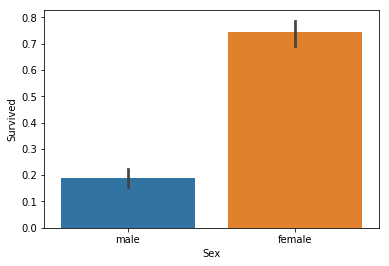

In [68]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

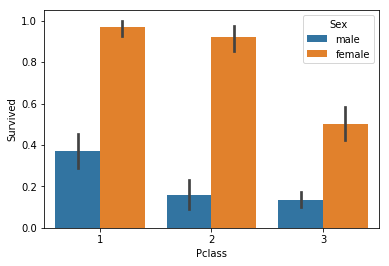

In [70]:
#부자와 가난한 사람간의 생존확률
#성별까지 함께 고려하는 경우(각 x축에 대해 각각 비교해야 하므로 hue의 값에 넣어준다.)
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [71]:
#age에 따라 재정의
def get_category(age): #각변수에 대해 하나씩 적용하는 경우
    cat='' #변수 초기화
    if age<=-1: cat='Unknoewn'
    elif age <=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat #재정의한 변수를 적용

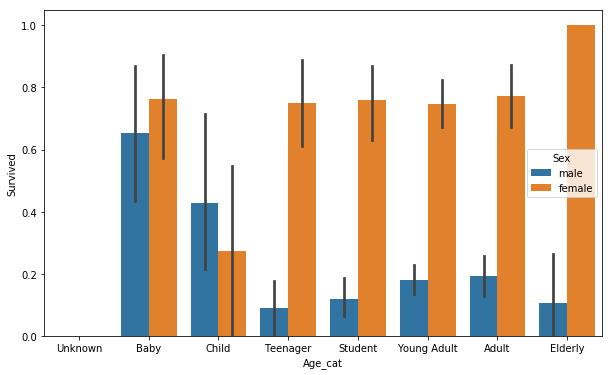

In [72]:
plt.figure(figsize=(10,6))
#x축
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
#재정의하여 새로운 변수를 지정
#gey_category(x)에서의 입력값으로 age를 받아 해당함수에 지정
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x) )
sns.barplot(x= 'Age_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names)

In [73]:
#앞에서 전반적인 구조를 파악하기 위해 한 작업이고
#분석시에는 필요가 없기 때문에 drop
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [75]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [76]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [86]:
#NULL 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) #age의 평균값으로 대체
    df['Cabin'].fillna('N',inplace=True)            #Cabin열에서의 na값은 N으로 대체
    df['Embarked'].fillna('N',inplace=True) 
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성의 제거(변수 drop)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1] #Cabin열에서의 가장 앞 글자만이 중요하므로 인덱싱
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
#앞에서 설명한 함수 3개를 한 함수에 담아 실행하도록한다(stack)
#따라서 이 함수만을 호출하면 된다
def transform_features(df):
    df=fillna(df) #결측값 대체
    df=drop_features(df) #분석에 필요없는 feature을 drop
    df=format_features(df) #레이블 인덱싱이 필요한 경우 레이블 인덱싱 실행
    return df

In [87]:
#원본데이터를 재로딩하고 feature dataset과 labelset 추출
titanic_df=pd.read_csv('train.csv')
y_titanic=titanic_df['Survived'] #예측할 y변수를 의미한다
X_titanic=titanic_df.drop('Survived',axis=1)
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [88]:
X_titanic=transform_features(X_titanic) #앞에서 설정한 데이터 전처리 실행

In [89]:
#적절한 모델을 선택했는지를 살펴보기 위해 train data를 split하여 그 정확도를 알아보는 과정이다
#train data는 실제 답이 있는 과정이고, test data는 답이 없는 것에 대해 값을 예측하는 과정이기 때문이다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic, y_titanic, test_size=2, random_state=11)

ML 알고리즘인 결정트리, 랜덤포레스트, 로지스틱 회귀를 사용하여 타이타닉 생존자를 예측해 본다

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#모델을 적용하기 위한 Classifier class의 생성
#결정트리, 랜덤 포레스트, 로지스틱 회귀의 사용하기 위한 객체를 선언하는 과정
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

위에서 각 모델 결정트리, 랜덤포레스트, 로지스틱 회귀에 대해 식을 적용하기 위한 객체를 생성하였다. 그에 대해 **학습/예측/평가**를 시행해야 한다.

In [95]:
#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)   #모델 적용
dt_pred=dt_clf.predict(X_test) #예측은 test에 대해 수행하는 것이므로
print("DecisionTreeClassifier의 정확도: {0: .4f}".format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier의 정확도:  0.5000


In [98]:
#RandomForestClassifier의 학습/예측/평가
rf_clf.fit(X_train, y_train) #train dataset에 대하여 모델을 학습
rf_pred=rf_clf.predict(X_test) #test dataset에 대하여 y를 예측한다
print('RandomForestClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, rf_pred))) #y_test변수와 pred변수의 차이를 활용한 정확도

RandomForestClassifier 정확도:  0.5000


In [99]:
#LogisticRegression의 학습/예측/평가
lr_clf.fit(X_train, y_train) #train dataset에 대하여 모델을 학습
lr_pred=lr_clf.predict(X_test)
print("LogisticRegression의 정확도: {0: .4f}".format(accuracy_score(y_test, lr_pred)))

LogisticRegression의 정확도:  0.5000


아직 최적화 작업을 실시하지 않았고 데이터의 양도 충분하지 않기 때문에 어떤 알고리즘의 양이 충분하다고 말할 수는 없다. 다음으로는 교차검증으로 결정트리 모델을 좀더 평가해볼 것이다. fold=5로 하여 kfold를 이용하여 분석해볼 예정이다.

앞에서의 내용을 복습하자면, 데이터의 편중을 막기 위해(희소한 중요한 가치의 데이터를 놓치지 않기 위해 ) 별도의 여러 셋으로 구성된 세트와 검증된 데이터 세트에서의 학습과 평가를 수행할 예정이다.<br>
앞에서 봤듯이, **교차검증은 결국 표본추출과 비슷하다**data의 형태에 따라(데이터가 어떤 condition으로 되어있느냐에 따라) 다른 방법으로 교차검증을 하여 split하고 모델에 fit해주는 형태이다 
 - KFold를 이용한 교차검증
 - cross_val_score()을 이용한 교차검증
 - GridSearchCV를 이용한 하이퍼파라미터 결정

In [111]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트가 5개인 KFold객체를 생성, 폴드수만큼 예측 결과 저장을 위한 리스트의 생성
    kfold=KFold(n_splits=folds)
    scores=[] #5개의 평가 척도를 저장하기 위한 리스트 생성
    
    #KFold 교차 검증 수행하기 위해 새로운 train, test data를 생성한다
    for iter_count,(train_index, test_index) in enumerate(kfold.split(X_titanic)):
        X_train, X_test=X_titanic.values[train_index], X_titanic.values[test_index] #df->array로 train, test 새로 생성
        y_train, y_test=y_titanic.values[train_index], y_titanic.values[test_index]
        #학습, 예측, 정확도의 예측
        clf.fit(X_train, y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))
    #전체 형균 정확도의 계산
    mean_score=np.mean(scores)
    print('평균 정확도: {0: .4f}'.format(mean_score))
#exec_kfold의 호출
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도:  0.7542
교차검증 1 정확도:  0.7809
교차검증 2 정확도:  0.7865
교차검증 3 정확도:  0.7697
교차검증 4 정확도:  0.8202
평균 정확도:  0.7823


Stratified kfold를 위한 교차검증의 사용

In [113]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_clf, X_titanic, y_titanic, cv=5)
#출력
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0}정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {0: .4f}'.format(np.mean(scores)))

교차검증 0정확도: 0.7430
교차검증 1정확도: 0.7765
교차검증 2정확도: 0.7809
교차검증 3정확도: 0.7753
교차검증 4정확도: 0.8418
평균 정확도:  0.7835


마지막으로 GridSearchCV를 이용하여 DecisionTreeClassifier의 최적 파라미터를 찾고 예측 성능을 측정한다.

In [119]:
from sklearn.model_selection import GridSearchCV

In [122]:
parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimatior로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8369
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.5000
